## Data Exploration

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
# load data
df = pd.read_csv('../input_data/breast_cancer_data.txt',sep= ',')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We will drop out the first column `id` and move the target `diagnosis` to the last column, just for convenience.

In [4]:
df = df.drop('id', axis=1) # remove id column
df1 = df.pop('diagnosis') # remove column diagnosis and store it in df1
df['diagnosis'] = df1 # add df1 to df as a 'new' column

The data contain 30 features:<br/>
0) radius_mean <br/>
1) texture_mean <br/>
2) perimeter_mean <br/>
3) area_mean <br/>
4) smoothness_mean <br/>
5) compactness_mean <br/>
6) concavity_mean <br/>
7) concave points_mean <br/>
8) symmetry_meanL <br/>
9) fractal dimension_mean<br/>
10) radius_se
11) texture_se
12) perimeter_se
13) area_se
14) smoothness_se
15) compactness_se
16) concavity_se
17) concave points_se
18) symmetry_se
19) fractal_dimension_se
20) radius_worst
21) texture_worst
22) perimeter_worst
23) area_worst,
24) smoothness_worst,
25) compactness_worst
26) concavity_worst
27) concave points_worst
28) symmetry_worst
29) fractal_dimension_worst

and 1 target: diagnosis (B: Benign--> 0, M: Malignant--> 1) <br/>


0) radius: distances from center to points on the perimeter<br/>
1) texture: standard deviation of gray-scale values<br/>
2) perimeter <br/>
3) area_mean <br/>
4) smoothness_mean: local variation in radius lengths<br/>
5) compactness_mean: perimeter^2/area - 1.0 <br/>
6) concavity_mean: severity of concave portions of the contour<br/>
7) concave points_mean: number of concave portions of the contour<br/>
8) symmetry_meanL <br/>
9) fractal dimension_mean: coastline approximation" - 1<br/>

In [5]:
# convert B to -1, M to 1:
df.diagnosis = [0 if t == "B" else 1 for t in df.diagnosis]

In [6]:
# select features and target:
ds = np.array(df).astype(float)

# features:
X = ds[:,:-1]
l,n = X.shape
print(l,n)

# target:
y = ds[:,-1]

(569, 30)


### Features

/home/tai/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tai/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tai/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tai/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tai/anaconda2/lib/python2.7/site-packages/

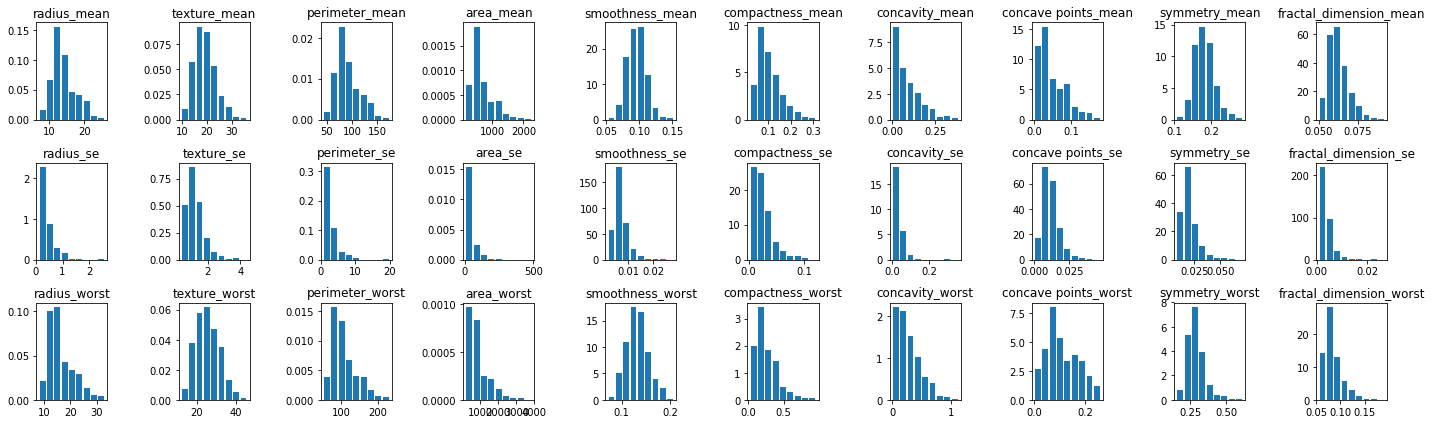

In [18]:
plt.figure(figsize=(20,6))
nrow = 3
ncol = 10
features = df.columns
for j in range(nrow):
    for i in range(ncol):
        ii = j*ncol + i
        plt.subplot2grid((nrow,ncol),(j,i))
        bins = np.linspace(min(X[:,ii]), max(X[:,ii]),10, endpoint=False)
        plt.hist(X[:,ii],bins,histtype='bar',rwidth=0.8,normed=True)
        plt.title('%s'%features[ii])
        plt.tight_layout(h_pad=1, w_pad=1.5)        

### Target

Text(0.5,1,'target')

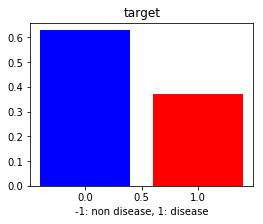

In [19]:
plt.figure(figsize=(4,3))
plt.bar(0,sum(y==0)/float(l),width=0.8,color='blue',label='non disease')
plt.bar(1,sum(y==1)/float(l),width=0.8,color='red',label='disease')
plt.xlabel('-1: non disease, 1: disease')
plt.title('target')